<a href="https://colab.research.google.com/github/nt-emmanuel/Loan-Default-Prediction/blob/main/Loan_Default_Risk_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# import the data
url = 'https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainperf.csv'

In [5]:
#load the data and get a sample of the data

perf_df = pd.read_csv(url)
perf_df.sample(7)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
785,8a85888c54be35040154c4d992b40fbe,301986291,13,2017-07-19 19:01:19.000000,2017-07-19 18:01:11.000000,40000.0,44000.0,30,NaN,Good
2544,8a858f965bb63a25015bbb332f6f7592,301970888,4,2017-07-10 07:24:28.000000,2017-07-10 06:24:23.000000,20000.0,24500.0,30,8a858f8658c206a90158c93edbb13b71,Good
1803,8a858ec9590ad35d01592fc002540aa9,301999906,5,2017-07-28 07:09:23.000000,2017-07-28 06:09:17.000000,10000.0,13000.0,30,NaN,Good
1887,8a858e5f5a4d0511015a522ef53b26b4,302001690,2,2017-07-29 07:17:42.000000,2017-07-29 06:17:33.000000,10000.0,13000.0,30,NaN,Good
3411,8a858fa257d8223c0157e6678b8a1e8b,301964977,12,2017-07-05 14:37:41.000000,2017-07-05 13:37:35.000000,40000.0,48000.0,60,NaN,Good
482,8a858fc45c5f93be015c61e0e5e55e38,301981333,3,2017-07-17 08:52:06.000000,2017-07-17 07:52:00.000000,10000.0,11500.0,15,NaN,Good
1230,8a858e585693982b01569523bc104609,301965246,12,2017-07-05 17:28:31.000000,2017-07-05 16:28:25.000000,40000.0,44000.0,30,NaN,Good


### Data Understanding and Data Cleaning

In [6]:
perf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     4368 non-null   object 
 1   systemloanid   4368 non-null   int64  
 2   loannumber     4368 non-null   int64  
 3   approveddate   4368 non-null   object 
 4   creationdate   4368 non-null   object 
 5   loanamount     4368 non-null   float64
 6   totaldue       4368 non-null   float64
 7   termdays       4368 non-null   int64  
 8   referredby     587 non-null    object 
 9   good_bad_flag  4368 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 341.4+ KB


The following issues are seen in the data:


*   Approved date and creation date are not in the right data types
*   Referredby column has a lot of missing values



In [7]:
perf_df.duplicated().sum() # from the output, there are no duplicates in the dataset

np.int64(0)

In [8]:
# check the percentage of missing values in each column
((perf_df.isna().mean()) * 100).round(2).sort_values(ascending=False)

,0
referredby,86.56
customerid,0.00
systemloanid,0.00
loannumber,0.00
creationdate,0.00
approveddate,0.00
loanamount,0.00
totaldue,0.00
termdays,0.00
good_bad_flag,0.00


Referredby column has over 80% missing values and so we will drop that column subsequently, it won't be used for the analysis and prediction

In [9]:
# convert approveddate and creationdate to datetime columns

perf_df['approveddate'] = pd.to_datetime(perf_df['approveddate'], errors='coerce')
perf_df['creationdate'] = pd.to_datetime(perf_df['creationdate'], errors='coerce')

In [10]:
#confirm if the changes in data types are effected

perf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customerid     4368 non-null   object        
 1   systemloanid   4368 non-null   int64         
 2   loannumber     4368 non-null   int64         
 3   approveddate   4368 non-null   datetime64[ns]
 4   creationdate   4368 non-null   datetime64[ns]
 5   loanamount     4368 non-null   float64       
 6   totaldue       4368 non-null   float64       
 7   termdays       4368 non-null   int64         
 8   referredby     587 non-null    object        
 9   good_bad_flag  4368 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(3), object(3)
memory usage: 341.4+ KB


In [11]:
# we will be dropping referredby column

perf_df1 = perf_df.drop(columns=['referredby'], axis = 1)
perf_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customerid     4368 non-null   object        
 1   systemloanid   4368 non-null   int64         
 2   loannumber     4368 non-null   int64         
 3   approveddate   4368 non-null   datetime64[ns]
 4   creationdate   4368 non-null   datetime64[ns]
 5   loanamount     4368 non-null   float64       
 6   totaldue       4368 non-null   float64       
 7   termdays       4368 non-null   int64         
 8   good_bad_flag  4368 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(3), object(2)
memory usage: 307.3+ KB


In [12]:
url2 = 'https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/traindemographics.csv'

In [13]:
demo_df = pd.read_csv(url2)
demo_df

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN
...,...,...,...,...,...,...,...,...,...
4341,8a858f155554552501555588ca2b3b40,1985-12-13 00:00:00.000000,Other,3.236753,7.030168,Stanbic IBTC,NaN,Permanent,Graduate
4342,8a858fc65cf978f4015cf97cee3a02ce,1982-07-01 00:00:00.000000,Savings,7.013750,4.875662,GT Bank,NaN,NaN,NaN
4343,8a858f4f5b66de3a015b66fc83c61902,1989-09-26 00:00:00.000000,Savings,6.295530,7.092508,GT Bank,NaN,Permanent,NaN
4344,8aaae7a74400b28201441c8b62514150,1985-09-06 00:00:00.000000,Savings,3.354206,6.539070,GT Bank,HEAD OFFICE,Permanent,Primary


In [14]:
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4346 non-null   object 
 1   birthdate                   4346 non-null   object 
 2   bank_account_type           4346 non-null   object 
 3   longitude_gps               4346 non-null   float64
 4   latitude_gps                4346 non-null   float64
 5   bank_name_clients           4346 non-null   object 
 6   bank_branch_clients         51 non-null     object 
 7   employment_status_clients   3698 non-null   object 
 8   level_of_education_clients  587 non-null    object 
dtypes: float64(2), object(7)
memory usage: 305.7+ KB


In [15]:
demo_df.duplicated().sum()

np.int64(12)

In [16]:
demo_df[demo_df.duplicated(keep=False)] # to confirm that the rows are actual duplicates in every column

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
138,8a858fca5c35df2c015c39ad8695343e,1980-11-26 00:00:00.000000,Savings,3.352588,7.211089,GT Bank,NaN,Permanent,NaN
159,8a858fca5c35df2c015c39ad8695343e,1980-11-26 00:00:00.000000,Savings,3.352588,7.211089,GT Bank,NaN,Permanent,NaN
272,8a858edd57f790040157ffe9b6ed3fbb,1988-01-18 00:00:00.000000,Other,3.782563,7.171356,First Bank,NaN,Permanent,Secondary
445,8a858e6c5c88d145015c8b9627cd5a48,1979-09-30 00:00:00.000000,Savings,3.367008,6.497313,Sterling Bank,NaN,Permanent,NaN
517,8a858edd57f790040157ffe9b6ed3fbb,1988-01-18 00:00:00.000000,Other,3.782563,7.171356,First Bank,NaN,Permanent,Secondary
750,8a858f965bb63a25015bbf63fd062e2e,1974-02-25 00:00:00.000000,Savings,3.936366,6.817958,Stanbic IBTC,NaN,Permanent,NaN
776,8a858f965bb63a25015bbf63fd062e2e,1974-02-25 00:00:00.000000,Savings,3.936366,6.817958,Stanbic IBTC,NaN,Permanent,NaN
798,8a858fc75cd62882015cdaf2f4311b3f,1975-10-27 00:00:00.000000,Savings,7.437607,9.088935,GT Bank,NaN,Permanent,NaN
1010,8a858fe65675195a015679452588279c,1982-08-01 00:00:00.000000,Savings,7.533646,9.046885,UBA,NaN,Permanent,NaN
1015,8a858fe65675195a015679452588279c,1982-08-01 00:00:00.000000,Savings,7.533646,9.046885,UBA,NaN,Permanent,NaN


In [17]:
# drop duplicates

demo_df.drop_duplicates(inplace=True)
demo_df.duplicated().sum()

np.int64(0)

In [18]:
# to check the percentage of missing values
((demo_df.isna().mean()) * 100).round(2).sort_values(ascending=False)

,0
bank_branch_clients,98.82
level_of_education_clients,86.48
employment_status_clients,14.95
customerid,0.00
birthdate,0.00
latitude_gps,0.00
longitude_gps,0.00
bank_account_type,0.00
bank_name_clients,0.00


From the info above, we notice that:


*   bank_branch_clients has only 51 non-null values (over 98% missing values) and will be dropped from the dataset to be used for prediction.
*   level_of_education_clients also has numerous missing values (over 86% missing values) and will be dropped from the dataset.
* employment_status_clients has only about 15% missing values and will be filled with 'unknown'.
* data type in birthdate will be converted to datetime.



In [19]:
# changing data type in birthdate column

demo_df['birthdate'] = pd.to_datetime(demo_df['birthdate'], errors = 'coerce')

In [20]:
# fill missing values in employment_status_clients with "unknown"

demo_df['employment_status_clients'] = demo_df['employment_status_clients'].fillna('Unknown')

In [21]:
# dropping the columns with lots of missing values

demo_df1 = demo_df.drop(columns=['bank_branch_clients', 'level_of_education_clients'], axis = 1)
demo_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4334 entries, 0 to 4345
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   customerid                 4334 non-null   object        
 1   birthdate                  4334 non-null   datetime64[ns]
 2   bank_account_type          4334 non-null   object        
 3   longitude_gps              4334 non-null   float64       
 4   latitude_gps               4334 non-null   float64       
 5   bank_name_clients          4334 non-null   object        
 6   employment_status_clients  4334 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 270.9+ KB


In [22]:
url3 = 'https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainprevloans.csv'

In [23]:
prev_df = pd.read_csv(url3)
prev_df.sample(7)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
196,8a858ec95afc0922015affaaf5992c1a,301913466,3,2017-05-19 12:58:49.000000,2017-05-19 11:58:42.000000,10000.0,11500.0,15,2017-06-01 10:09:32.000000,NaN,2017-06-05 00:00:00.000000,2017-06-01 09:59:23.000000
9503,8a858ea355660956015573132d287253,301722557,4,2016-09-21 07:54:46.000000,2016-09-21 06:54:37.000000,10000.0,13000.0,30,2016-10-24 13:24:07.000000,NaN,2016-10-24 00:00:00.000000,2016-10-24 13:08:59.000000
14677,8a858fbd59b080790159b0afab650fed,301823859,3,2017-02-22 08:00:40.000000,2017-02-22 07:00:25.000000,10000.0,11500.0,15,2017-03-04 06:33:54.000000,NaN,2017-03-09 00:00:00.000000,2017-03-04 06:18:43.000000
8905,8a8589a453bc422d0153c7b616f60646,301811631,4,2017-02-07 10:15:11.000000,2017-02-07 09:15:03.000000,20000.0,21900.0,15,2017-02-19 16:15:19.000000,NaN,2017-02-22 00:00:00.000000,2017-02-19 16:00:05.000000
8875,8a858ee45a1e6afb015a22a2e525677b,301813471,1,2017-02-09 12:56:40.000000,2017-02-09 11:56:13.000000,10000.0,11500.0,15,2017-02-24 11:24:39.000000,NaN,2017-02-24 00:00:00.000000,2017-02-24 11:09:29.000000
3788,8a858ed359fe43b10159fe9d723f243d,301954830,7,2017-06-28 14:27:35.000000,2017-06-28 13:27:29.000000,30000.0,34500.0,30,2017-07-25 09:14:48.000000,NaN,2017-07-28 00:00:00.000000,2017-07-25 09:04:38.000000
2947,8a858f61587afbaf01587c8b719c1a6e,301771365,3,2016-12-09 10:22:08.000000,2016-12-09 09:21:57.000000,20000.0,21900.0,15,2016-12-23 14:57:34.000000,NaN,2016-12-27 00:00:00.000000,2016-12-23 14:42:25.000000


In [24]:
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       18183 non-null  object 
 1   systemloanid     18183 non-null  int64  
 2   loannumber       18183 non-null  int64  
 3   approveddate     18183 non-null  object 
 4   creationdate     18183 non-null  object 
 5   loanamount       18183 non-null  float64
 6   totaldue         18183 non-null  float64
 7   termdays         18183 non-null  int64  
 8   closeddate       18183 non-null  object 
 9   referredby       1026 non-null   object 
 10  firstduedate     18183 non-null  object 
 11  firstrepaiddate  18183 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.7+ MB


In [25]:
((prev_df.isna().mean()) * 100).round(2).sort_values(ascending=False)

,0
referredby,94.36
customerid,0.00
loannumber,0.00
systemloanid,0.00
approveddate,0.00
creationdate,0.00
totaldue,0.00
loanamount,0.00
termdays,0.00
closeddate,0.00


In [26]:
# to check for duplicates
prev_df.duplicated().sum()

np.int64(0)

From the info above, we notice that;


*   Referred by has a lot of missing data, over 94% and will be dropped from the dataset
*   Some columns (approveddate, creationdate,closeddate, firstduedate and firstrepaiddate have to be changed to from object to datetime)



In [27]:
# drop the referredbycolumn

prev_df1 = prev_df.drop(columns = ['referredby'], axis = 1)

In [28]:
# to change the datatype to datetime

datecolumns = ['approveddate', 'creationdate', 'closeddate', 'firstduedate', 'firstrepaiddate']

In [29]:
for cols in datecolumns:
  prev_df1[cols] = pd.to_datetime(prev_df1[cols], errors = 'coerce')

In [30]:
prev_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customerid       18183 non-null  object        
 1   systemloanid     18183 non-null  int64         
 2   loannumber       18183 non-null  int64         
 3   approveddate     18183 non-null  datetime64[ns]
 4   creationdate     18183 non-null  datetime64[ns]
 5   loanamount       18183 non-null  float64       
 6   totaldue         18183 non-null  float64       
 7   termdays         18183 non-null  int64         
 8   closeddate       18183 non-null  datetime64[ns]
 9   firstduedate     18183 non-null  datetime64[ns]
 10  firstrepaiddate  18183 non-null  datetime64[ns]
dtypes: datetime64[ns](5), float64(2), int64(3), object(1)
memory usage: 1.5+ MB


At this stage we can't merge the three datasets because the rows are unequal and would lead to a large number of null values if merged at the present state. So we will perform some feature enginnering to obtain some meaningful features per customer for our project.

In [31]:
# Interest rate per loan taken

prev_df1['Interestrate(%)'] = (((prev_df1['totaldue'] - prev_df1['loanamount'])/prev_df1['loanamount']) * 100).round(2)
prev_df1.sample(3)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,firstduedate,firstrepaiddate,Interestrate(%)
16483,8a858ee0560bc0770156147da1c27409,301659435,1,2016-07-23 23:36:32,2016-07-23 22:36:20,10000.0,13000.0,30,2016-08-12 12:14:35,2016-08-22,2016-08-12 11:59:32,30.00
9523,8a858f765a4e7c76015a5a9340ce2a38,301946796,6,2017-06-21 18:11:16,2017-06-21 17:10:08,20000.0,22250.0,15,2017-07-03 08:49:39,2017-07-06,2017-07-03 08:39:29,11.25
17819,8a858f445a4c929e015a4ca09cf50f44,301934472,7,2017-06-11 07:41:29,2017-06-11 06:41:21,30000.0,34500.0,30,2017-07-02 18:14:53,2017-07-11,2017-07-02 18:04:43,15.00


In [32]:
# average gap between first due date and first repaid date

prev_df1['Repaydelay'] = (prev_df1['firstrepaiddate'] - prev_df1['firstduedate']).dt.days
prev_df1.sample(3)

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,firstduedate,firstrepaiddate,Interestrate(%),Repaydelay
4938,8a858f585bfd6341015c005942497b6c,301932205,2,2017-06-09 06:31:22,2017-06-09 05:31:16,10000.0,11500.0,15,2017-06-15 11:37:59,2017-06-26,2017-06-15 11:27:50,15.0,-11
8272,8a858f9c56aaf37d0156b33ea59903c9,301712391,2,2016-09-11 18:41:29,2016-09-11 17:41:21,10000.0,11500.0,15,2016-09-26 10:37:14,2016-09-26,2016-09-26 10:22:05,15.0,0
4151,8a858e0a5a85cfaa015a89b1af345719,301828953,1,2017-03-01 12:57:12,2017-03-01 11:56:49,10000.0,13000.0,30,2017-03-28 12:30:01,2017-03-31,2017-03-28 12:14:51,30.0,-3


In [33]:
# Summary of previous loans per customer grouped by the customer id

prev_sum = prev_df1.groupby('customerid').agg({ # create a dictionary
   'loanamount':['mean', 'max', 'count'], # average, maximum and number of past loans
   'loannumber': 'mean', #average loan days#
   'totaldue': ['mean', 'max'],  #average and maximum total loan due
                                                'Interestrate(%)': ['mean', 'max', 'min'], #average, maximum and minimum interest rate
                                                'Repaydelay':['mean', 'max', 'min'] #average, maximun and minimum delay in repayment
}).reset_index()

In [34]:
prev_sum.sample(3)

customerid loanamount                loannumber  \
                                             mean      max count       mean   
2597  8a858f295c8d307f015c9e4f9b771eed    10000.0  10000.0     1        1.0   
1059  8a858e6059e0a7080159e4a861cc71eb    14000.0  20000.0     5        3.0   
2838  8a858f445d41ebbe015d50c105334acc    10000.0  10000.0     1        1.0   

     totaldue          Interestrate(%)             Repaydelay          
         mean      max            mean   max   min       mean max min  
2597  11500.0  11500.0            15.0  15.0  15.0        0.0   0   0  
1059  17460.0  24500.0            26.3  30.0  19.0        2.4  18  -2  
2838  13000.0  13000.0            30.0  30.0  30.0      -22.0 -22 -22

In [35]:
prev_sum.columns = ['customerid', 'loanamount_mean', 'loanamount_max', 'loanamount_count', 'loannumber_mean', 'totaldue_mean',
                    'totaldue_max', 'Interestrate(%)_mean', 'Interestrate(%)_max', 'Interestrate(%)_min',
                    'Repaydelay_mean', 'Repaydelay_max', 'Repaydelay_min']

In [36]:
prev_sum.sample(5)

,customerid,loanamount_mean,loanamount_max,loanamount_count,loannumber_mean,totaldue_mean,totaldue_max,Interestrate(%)_mean,Interestrate(%)_max,Interestrate(%)_min,Repaydelay_mean,Repaydelay_max,Repaydelay_min
1829,8a858ec75bfd77c4015c00bdf0a967b1,10000.0,10000.0,2,1.5,11500.0,11500.0,15.00,15.0,15.0,-7.5,-6,-9
4063,8a858fd95c3b5bca015c40f1b1a005ec,10000.0,10000.0,1,1.0,13000.0,13000.0,30.00,30.0,30.0,6.0,6,6
1394,8a858e875c63d395015c72a2984d79c5,10000.0,10000.0,1,1.0,13000.0,13000.0,30.00,30.0,30.0,-7.0,-7,-7
1167,8a858e6a5bfd4b54015bfe4453635a92,10000.0,10000.0,1,1.0,13000.0,13000.0,30.00,30.0,30.0,-11.0,-11,-11
741,8a858e2d565657b1015663ff20d43576,10000.0,10000.0,4,2.5,12625.0,13000.0,26.25,30.0,15.0,-3.5,1,-12


Merging all datasets together

In [37]:
all_df = perf_df1.merge(demo_df1, on = 'customerid', how = 'left')

In [38]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   customerid                 4368 non-null   object        
 1   systemloanid               4368 non-null   int64         
 2   loannumber                 4368 non-null   int64         
 3   approveddate               4368 non-null   datetime64[ns]
 4   creationdate               4368 non-null   datetime64[ns]
 5   loanamount                 4368 non-null   float64       
 6   totaldue                   4368 non-null   float64       
 7   termdays                   4368 non-null   int64         
 8   good_bad_flag              4368 non-null   object        
 9   birthdate                  3269 non-null   datetime64[ns]
 10  bank_account_type          3269 non-null   object        
 11  longitude_gps              3269 non-null   float64       
 12  latitu

In [39]:
((all_df.isna().mean()) * 100).round(2).sort_values(ascending=False)

,0
latitude_gps,25.16
employment_status_clients,25.16
bank_name_clients,25.16
longitude_gps,25.16
bank_account_type,25.16
birthdate,25.16
customerid,0.00
totaldue,0.00
loanamount,0.00
creationdate,0.00


In [40]:
all_loandf =all_df.merge(prev_sum, on = 'customerid', how = 'left')

In [41]:
all_loandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   customerid                 4368 non-null   object        
 1   systemloanid               4368 non-null   int64         
 2   loannumber                 4368 non-null   int64         
 3   approveddate               4368 non-null   datetime64[ns]
 4   creationdate               4368 non-null   datetime64[ns]
 5   loanamount                 4368 non-null   float64       
 6   totaldue                   4368 non-null   float64       
 7   termdays                   4368 non-null   int64         
 8   good_bad_flag              4368 non-null   object        
 9   birthdate                  3269 non-null   datetime64[ns]
 10  bank_account_type          3269 non-null   object        
 11  longitude_gps              3269 non-null   float64       
 12  latitu

In [42]:
((all_loandf.isna().mean()) * 100).round(2).sort_values(ascending=False)

,0
birthdate,25.16
bank_account_type,25.16
longitude_gps,25.16
employment_status_clients,25.16
bank_name_clients,25.16
latitude_gps,25.16
loanamount_mean,0.21
loannumber_mean,0.21
loanamount_count,0.21
loanamount_max,0.21


Now, the all_loandf is the sole dataset we will be working with. I used the left join because I needed all data on customers in the performance dataset which has our target column. At this point, we'll have to further clean and explore our dataset before preprocessing and training the data on our preferred models.

In [43]:
# 1. Find the age of the customers

from datetime import datetime

In [44]:
today_date = pd.Timestamp.today() #current date

In [45]:
all_loandf['Age'] = ((today_date - all_loandf['birthdate']).dt.days // 365).round()

In [46]:
all_loandf.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'good_bad_flag',
       'birthdate', 'bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'employment_status_clients', 'loanamount_mean',
       'loanamount_max', 'loanamount_count', 'loannumber_mean',
       'totaldue_mean', 'totaldue_max', 'Interestrate(%)_mean',
       'Interestrate(%)_max', 'Interestrate(%)_min', 'Repaydelay_mean',
       'Repaydelay_max', 'Repaydelay_min', 'Age'],
      dtype='object')

In [47]:
# 2. drop irrelevant columns

loan_df = all_loandf.drop(columns = ['customerid', 'systemloanid', 'birthdate','latitude_gps',
                                    'longitude_gps', 'loannumber_mean', 'Interestrate(%)_max',
                                     'Interestrate(%)_min', 'Repaydelay_max', 'Repaydelay_min',
                                     'approveddate', 'creationdate'])
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loannumber                 4368 non-null   int64  
 1   loanamount                 4368 non-null   float64
 2   totaldue                   4368 non-null   float64
 3   termdays                   4368 non-null   int64  
 4   good_bad_flag              4368 non-null   object 
 5   bank_account_type          3269 non-null   object 
 6   bank_name_clients          3269 non-null   object 
 7   employment_status_clients  3269 non-null   object 
 8   loanamount_mean            4359 non-null   float64
 9   loanamount_max             4359 non-null   float64
 10  loanamount_count           4359 non-null   float64
 11  totaldue_mean              4359 non-null   float64
 12  totaldue_max               4359 non-null   float64
 13  Interestrate(%)_mean       4359 non-null   float

In [48]:
loan_df.columns

Index(['loannumber', 'loanamount', 'totaldue', 'termdays', 'good_bad_flag',
       'bank_account_type', 'bank_name_clients', 'employment_status_clients',
       'loanamount_mean', 'loanamount_max', 'loanamount_count',
       'totaldue_mean', 'totaldue_max', 'Interestrate(%)_mean',
       'Repaydelay_mean', 'Age'],
      dtype='object')

Handling missing values in both categorical and numerical columns

In [49]:
# categorical columns with missing values

categories = loan_df[['bank_account_type', 'bank_name_clients', 'employment_status_clients']]

In [50]:
#using a loop to fill the missing values with 'Unknown' - to serve as a different class of data in each column, on its own

for cat in categories:
  loan_df[cat] = loan_df[cat].fillna('Unknown')

<Axes: xlabel='Age'>

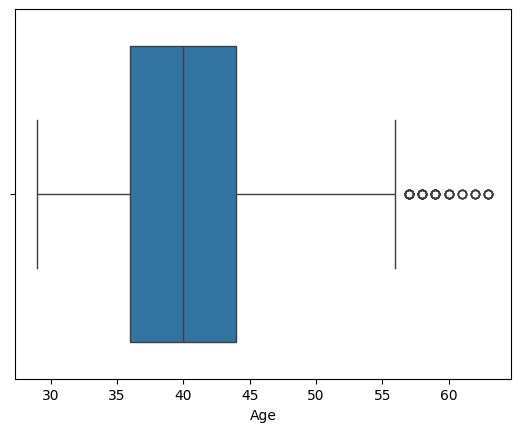

In [51]:
sns.boxplot(x=loan_df['Age']) # to check if there are outliers in the Age column

In [52]:
# numerical columns with missing vales
#Age

loan_df['Age'] = loan_df['Age'].fillna(loan_df['Age'].median()) #using median so it can handle outliers

In [53]:
loan_df.columns

Index(['loannumber', 'loanamount', 'totaldue', 'termdays', 'good_bad_flag',
       'bank_account_type', 'bank_name_clients', 'employment_status_clients',
       'loanamount_mean', 'loanamount_max', 'loanamount_count',
       'totaldue_mean', 'totaldue_max', 'Interestrate(%)_mean',
       'Repaydelay_mean', 'Age'],
      dtype='object')

In [54]:
# other numerical columns - we will drop the missing values in specific columns since its only 0.21%

loan_df = loan_df.dropna(subset = ['loanamount_mean', 'loanamount_max', 'loanamount_count',
                                   'totaldue_mean', 'totaldue_max', 'Interestrate(%)_mean', 'Repaydelay_mean'])

In [55]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4359 entries, 0 to 4367
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loannumber                 4359 non-null   int64  
 1   loanamount                 4359 non-null   float64
 2   totaldue                   4359 non-null   float64
 3   termdays                   4359 non-null   int64  
 4   good_bad_flag              4359 non-null   object 
 5   bank_account_type          4359 non-null   object 
 6   bank_name_clients          4359 non-null   object 
 7   employment_status_clients  4359 non-null   object 
 8   loanamount_mean            4359 non-null   float64
 9   loanamount_max             4359 non-null   float64
 10  loanamount_count           4359 non-null   float64
 11  totaldue_mean              4359 non-null   float64
 12  totaldue_max               4359 non-null   float64
 13  Interestrate(%)_mean       4359 non-null   float64
 1

### Data Exploration

In [56]:
# Rename columns adding pre- and curr- for easy identification

loan_df = loan_df.rename(columns = {
    'loanamount_mean': 'pre_meanloanamt',
    'loanamount_max': 'pre_maxloanamt',
    'loanamount_count': 'pre_loanamtcount',
    'totaldue_mean': 'pre_meantotaldue',
    'totaldue_max': 'pre_maxtotaldue',
    'Interestrate(%)_mean': 'pre_meaninterest',
    'Repaydelay_mean': 'pre_meanrepaydelay',
    'loanamount': 'curr_loanamount',
    'totaldue': 'curr_totaldue',
    'termdays': 'curr_termdays'
})

In [57]:
loan_df.columns

Index(['loannumber', 'curr_loanamount', 'curr_totaldue', 'curr_termdays',
       'good_bad_flag', 'bank_account_type', 'bank_name_clients',
       'employment_status_clients', 'pre_meanloanamt', 'pre_maxloanamt',
       'pre_loanamtcount', 'pre_meantotaldue', 'pre_maxtotaldue',
       'pre_meaninterest', 'pre_meanrepaydelay', 'Age'],
      dtype='object')

In [58]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4359 entries, 0 to 4367
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loannumber                 4359 non-null   int64  
 1   curr_loanamount            4359 non-null   float64
 2   curr_totaldue              4359 non-null   float64
 3   curr_termdays              4359 non-null   int64  
 4   good_bad_flag              4359 non-null   object 
 5   bank_account_type          4359 non-null   object 
 6   bank_name_clients          4359 non-null   object 
 7   employment_status_clients  4359 non-null   object 
 8   pre_meanloanamt            4359 non-null   float64
 9   pre_maxloanamt             4359 non-null   float64
 10  pre_loanamtcount           4359 non-null   float64
 11  pre_meantotaldue           4359 non-null   float64
 12  pre_maxtotaldue            4359 non-null   float64
 13  pre_meaninterest           4359 non-null   float64
 1

In [59]:
loan_df.sample(7)

,loannumber,curr_loanamount,curr_totaldue,curr_termdays,good_bad_flag,bank_account_type,bank_name_clients,employment_status_clients,pre_meanloanamt,pre_maxloanamt,pre_loanamtcount,pre_meantotaldue,pre_maxtotaldue,pre_meaninterest,pre_meanrepaydelay,Age
767,12,40000.0,48000.0,60,Good,Other,GT Bank,Student,22727.272727,40000.0,11.0,27327.272727,48000.0,20.121818,-1.909091,35.0
2061,4,20000.0,24500.0,30,Bad,Savings,GT Bank,Permanent,10333.333333,15000.0,3.0,12191.666667,16675.0,18.723333,0.666667,41.0
2542,3,10000.0,13000.0,30,Bad,Other,GT Bank,Permanent,10000.000000,10000.0,2.0,12250.000000,13000.0,22.500000,30.000000,43.0
3393,7,10000.0,11500.0,15,Good,Unknown,Unknown,Unknown,11666.666667,20000.0,6.0,13233.333333,21900.0,14.083333,5.333333,40.0
2018,4,20000.0,24500.0,30,Good,Savings,GT Bank,Permanent,10000.000000,10000.0,3.0,13000.000000,13000.0,30.000000,-8.666667,43.0
1443,2,10000.0,13000.0,30,Good,Savings,GT Bank,Permanent,10000.000000,10000.0,1.0,13000.000000,13000.0,30.000000,-12.000000,44.0
176,2,10000.0,13000.0,30,Good,Savings,Diamond Bank,Permanent,10000.000000,10000.0,1.0,13000.000000,13000.0,30.000000,-19.000000,38.0


In [60]:
## Data visualization to check for outliers and also check for skewness
# Group the data into numericals and categoricals again

numericals = loan_df.select_dtypes(include = ['int64', 'float64'])
categoricals = loan_df.select_dtypes(include = ['object']).columns.tolist()

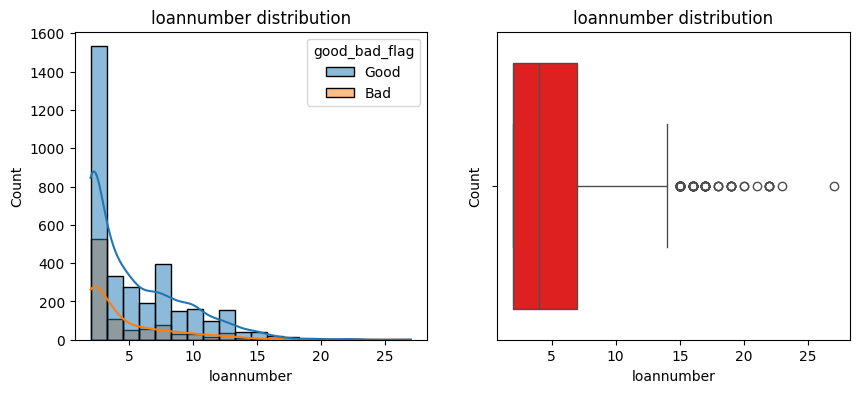

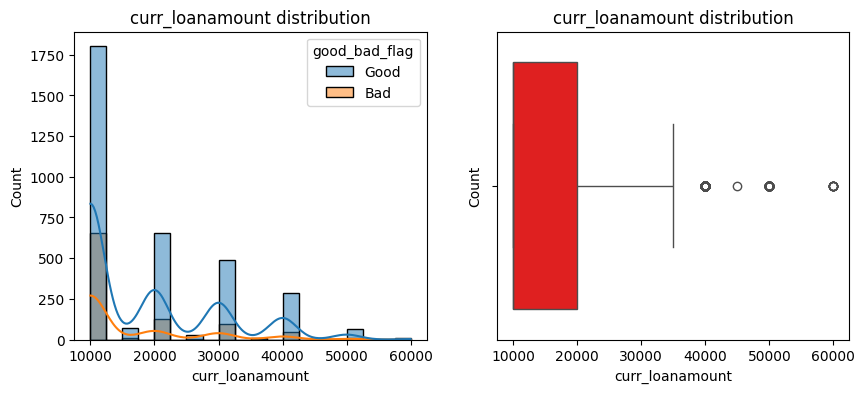

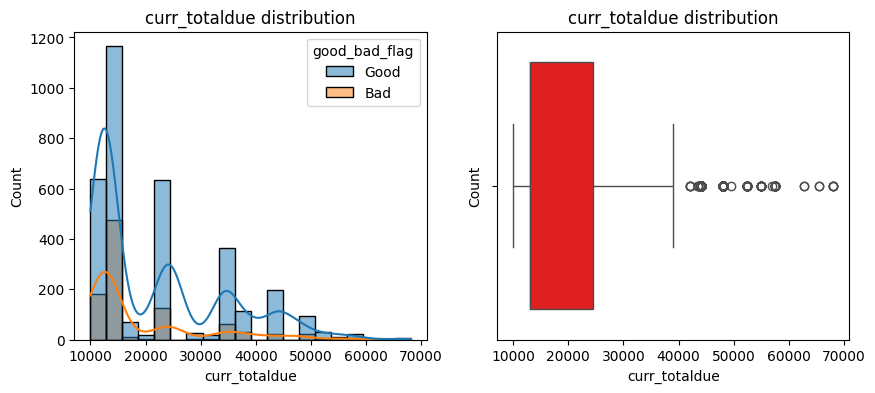

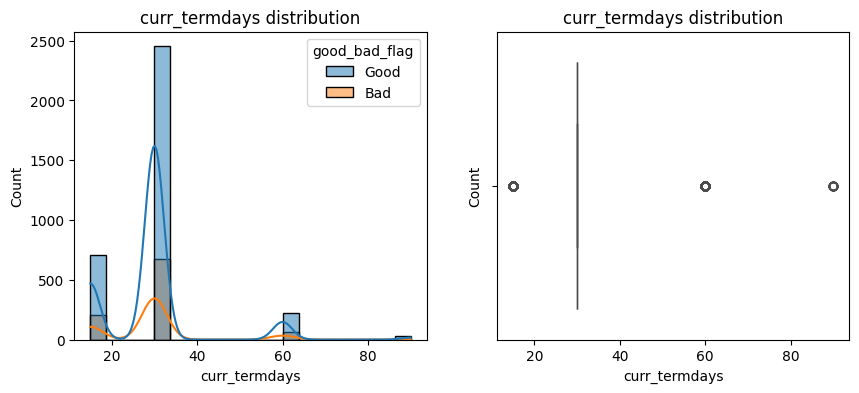

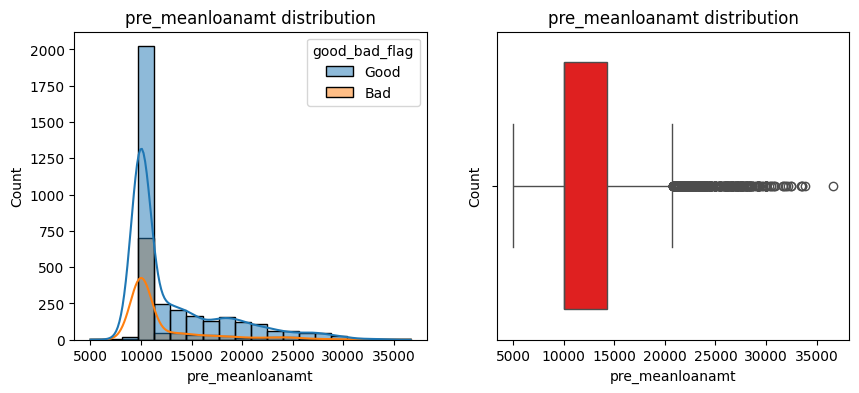

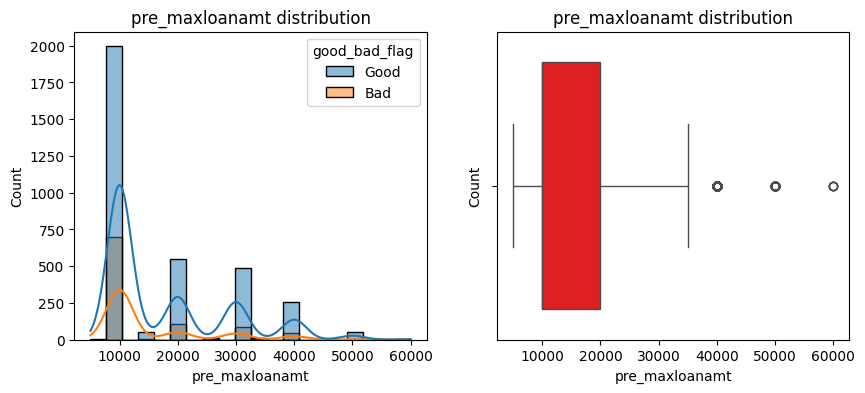

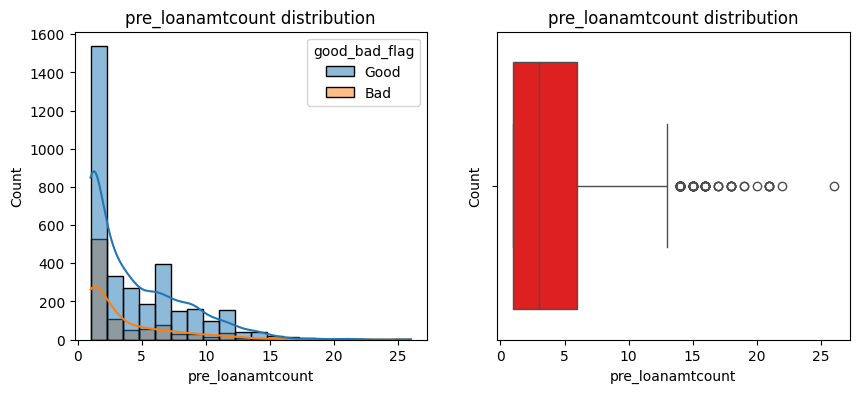

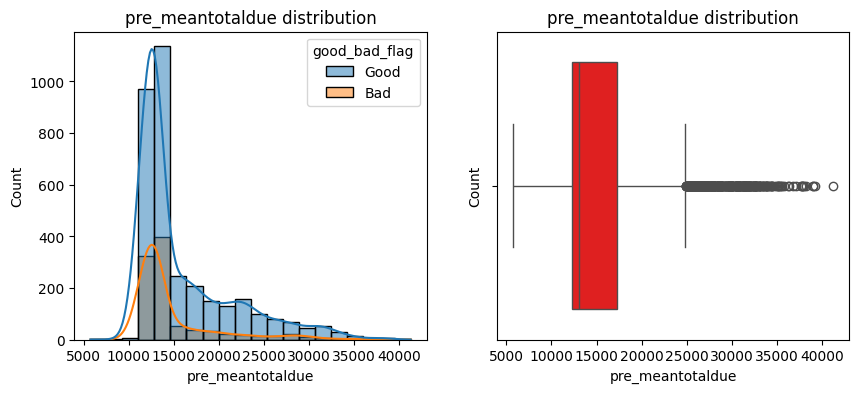

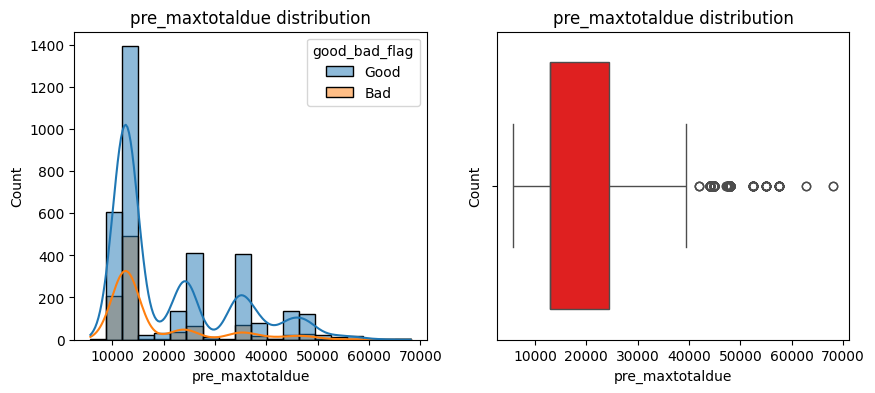

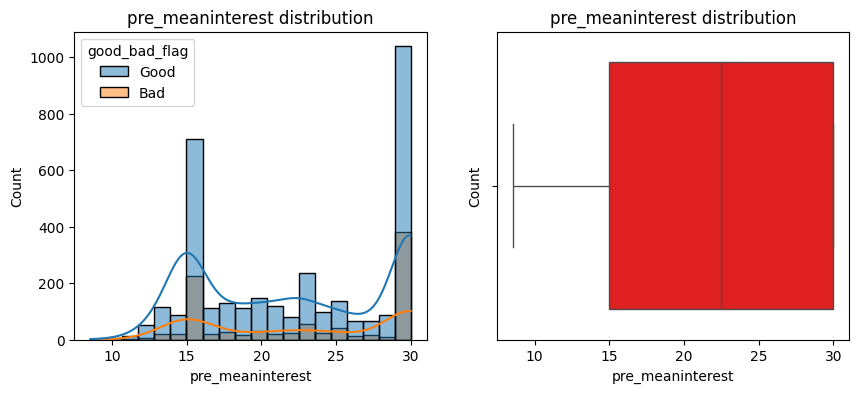

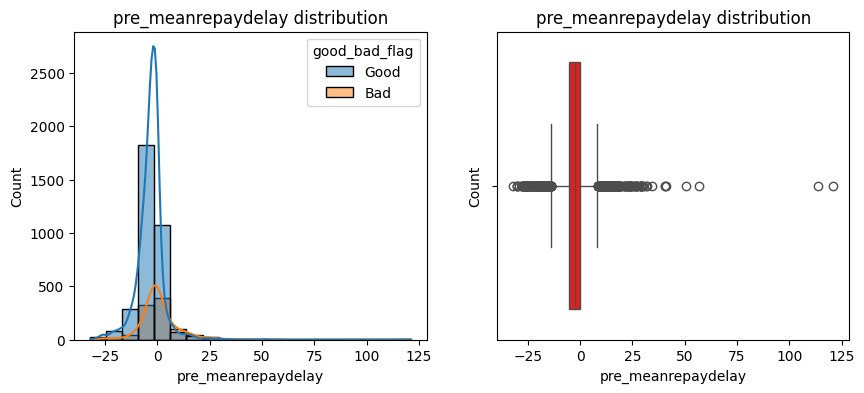

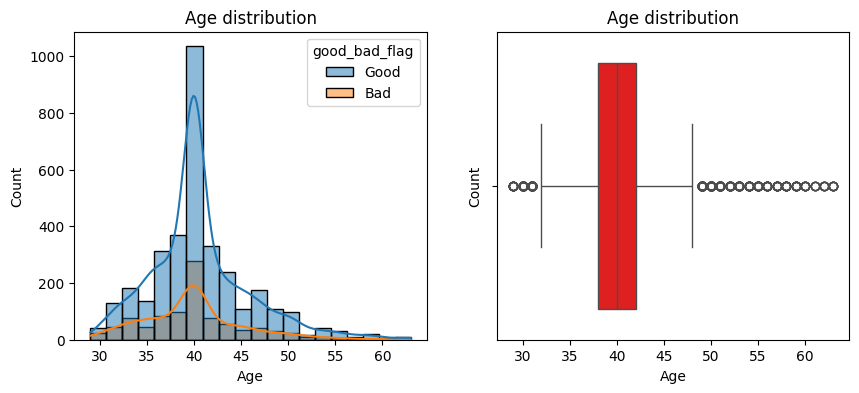

In [61]:
# plotting the graphs using loops

for num in numericals:
  plt.figure(figsize = (10,4))

#plot histogram
  plt.subplot(1, 2, 1)
  sns.histplot(data=loan_df, x=num, kde = True, bins = 20, hue = 'good_bad_flag')
  plt.title(f'{num} distribution')
  plt.xlabel(num)
  plt.ylabel('Count')

# plot boxplot
  plt.subplot(1, 2, 2)
  sns.boxplot(x = loan_df[num], color = 'red')
  plt.title(f'{num} distribution')
  plt.xlabel(num)
  plt.ylabel('Count')

  plt.show()

In [62]:
# check for skewness
num_skew = numericals.skew()
print(num_skew)

# from the charts and skewness results, most of the numerical columns don't really need transformation.

loannumber            1.302301
curr_loanamount       1.249207
curr_totaldue         1.164123
curr_termdays         1.934067
pre_meanloanamt       1.751235
pre_maxloanamt        1.351646
pre_loanamtcount      1.302862
pre_meantotaldue      1.716948
pre_maxtotaldue       1.274014
pre_meaninterest     -0.041357
pre_meanrepaydelay    2.535000
Age                   0.875172
dtype: float64


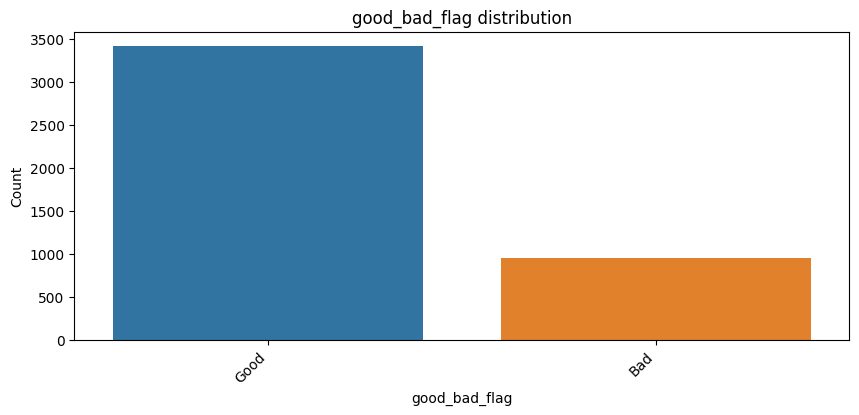

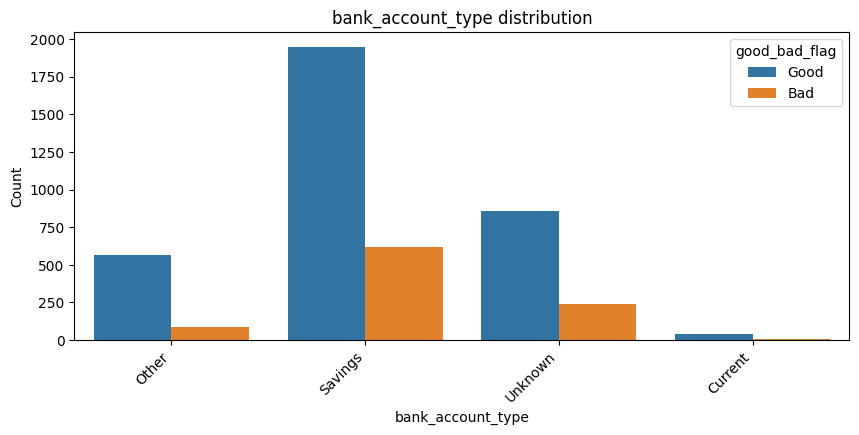

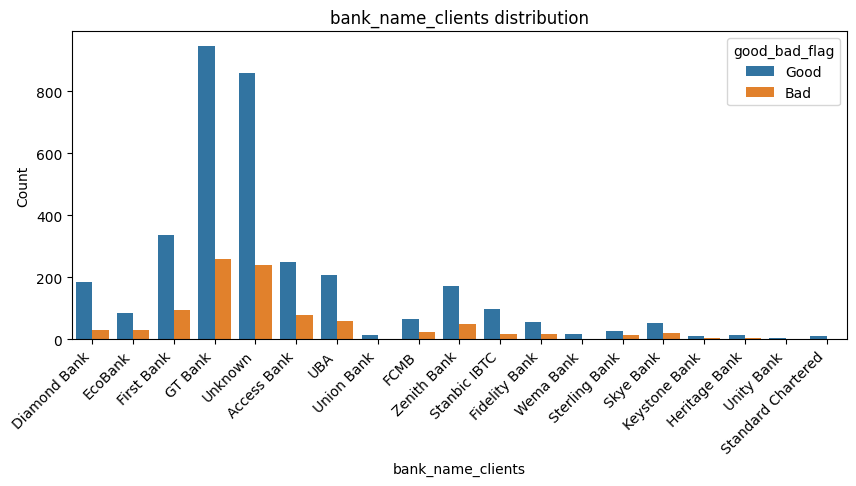

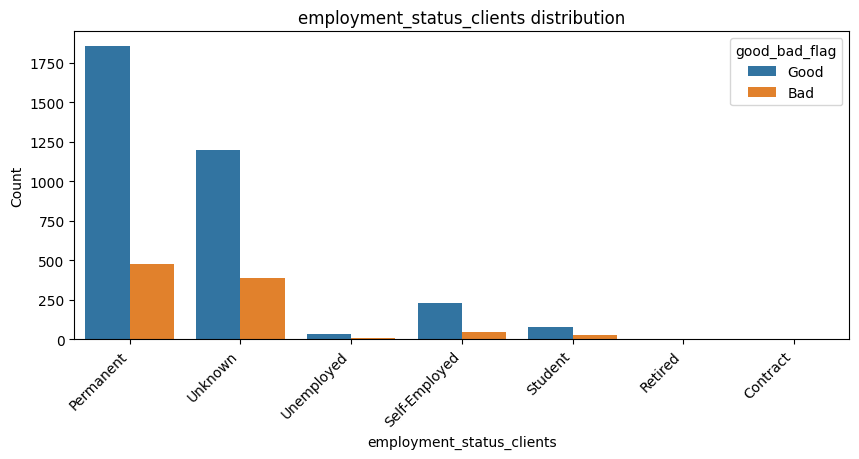

In [63]:
# plotting the distribution of the categorical columns

for cat in categoricals:
  plt.figure(figsize = (10,4))

#plot bar chart
  sns.countplot(data=loan_df, x=cat, hue='good_bad_flag')
  plt.title(f'{cat} distribution')
  plt.xlabel(cat)
  plt.ylabel('Count')
  plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

  plt.show()

In [64]:
loan_df.columns

Index(['loannumber', 'curr_loanamount', 'curr_totaldue', 'curr_termdays',
       'good_bad_flag', 'bank_account_type', 'bank_name_clients',
       'employment_status_clients', 'pre_meanloanamt', 'pre_maxloanamt',
       'pre_loanamtcount', 'pre_meantotaldue', 'pre_maxtotaldue',
       'pre_meaninterest', 'pre_meanrepaydelay', 'Age'],
      dtype='object')

Data Preprocessing

In [65]:
# split the columns into target and features columns

# target, y = good_bag_flag

y = loan_df['good_bad_flag']
x = loan_df.drop(columns = ['good_bad_flag'], axis = 1)

In [66]:
y.unique()

array(['Good', 'Bad'], dtype=object)

In [67]:
# convert the values in the target column into numbers, since just two categories

y = (y== 'Bad').astype(int)
y.value_counts()

,count
good_bad_flag,
0,3410
1,949


In [68]:
# import models, pipelines and evaluation metrics

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_validate
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline



In [69]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4359 entries, 0 to 4367
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loannumber                 4359 non-null   int64  
 1   curr_loanamount            4359 non-null   float64
 2   curr_totaldue              4359 non-null   float64
 3   curr_termdays              4359 non-null   int64  
 4   bank_account_type          4359 non-null   object 
 5   bank_name_clients          4359 non-null   object 
 6   employment_status_clients  4359 non-null   object 
 7   pre_meanloanamt            4359 non-null   float64
 8   pre_maxloanamt             4359 non-null   float64
 9   pre_loanamtcount           4359 non-null   float64
 10  pre_meantotaldue           4359 non-null   float64
 11  pre_maxtotaldue            4359 non-null   float64
 12  pre_meaninterest           4359 non-null   float64
 13  pre_meanrepaydelay         4359 non-null   float64
 1

In [70]:
# select categorical and numerical columns

num_cols = x.select_dtypes(include = ['int64', 'float64']).columns
cat_cols = x.select_dtypes(include = ['object']).columns

In [71]:
# scaling the numerical features

scaler = StandardScaler()
x_num = scaler.fit_transform(x[num_cols])
x_num.shape

(4359, 12)

In [72]:
# encoding the categorical columns

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
x_cat = encoder.fit_transform(x[cat_cols])
x_cat.shape

(4359, 30)

In [73]:
# combining both numerical and categorical columns

x_processed = np.hstack([x_num, x_cat])
x_processed.shape

(4359, 42)

In [74]:
# train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_processed, y, test_size=0.2, random_state=42, stratify=y
)

In [75]:
# training on models using a loop

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric="logloss"),
    "LightGBM": LGBMClassifier(random_state=42)
}

In [76]:
results = []

for name, model in models.items():
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  # evaluation
  acc = accuracy_score(y_test, y_pred)
  prec = precision_score(y_test, y_pred)
  rec = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)

  # saving results
  results.append({
    "Model": name,
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1 Score": f1
    })

  print(f"\n{name} - Confusion Matrix:")
  print(cm)

#save results in a table
results_df = pd.DataFrame(results).sort_values("F1 Score", ascending=False)
print("\nSummary Table:")
print(results_df)


Logistic Regression - Confusion Matrix:
[[667  15]
 [169  21]]

Random Forest - Confusion Matrix:
[[624  58]
 [147  43]]

XGBoost - Confusion Matrix:
[[628  54]
 [143  47]]
[LightGBM] [Info] Number of positive: 759, number of negative: 2728
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1082
[LightGBM] [Info] Number of data points in the train set: 3487, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217666 -> initscore=-1.279322
[LightGBM] [Info] Start training from score -1.279322

LightGBM - Confusion Matrix:
[[637  45]
 [145  45]]

Summary Table:
                 Model  Accuracy  Precision    Recall  F1 Score
2              XGBoost  0.774083   0.465347  0.247368  0.323024
3             LightGBM  0.782110   0.500000  0.236842  0.321429
1        Ra

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


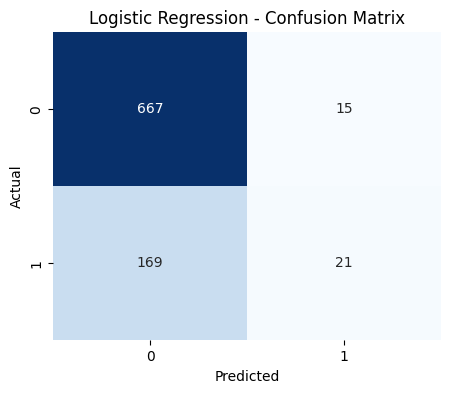

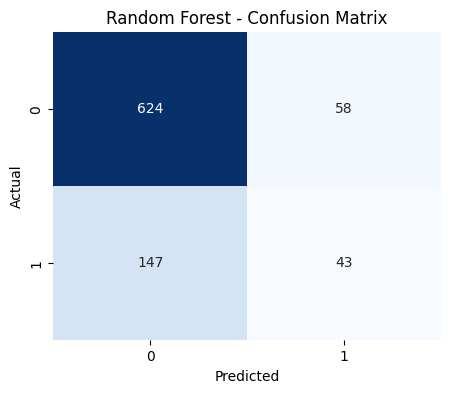

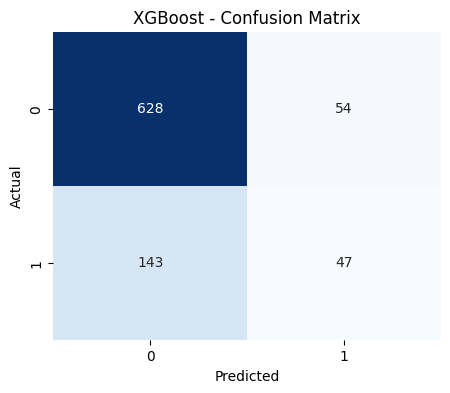

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


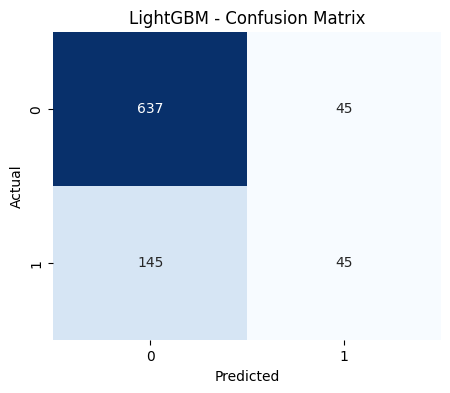

In [77]:
  # plotting the confusion matrix

  for name, model in models.items():
    y_pred = model.predict(x_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [78]:
# Models
modelss = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric="logloss",
                            learning_rate=0.1, scale_pos_weight=4),  # handles imbalance (Good/Bad ratio ≈ 80/20)
    "LightGBM": LGBMClassifier(random_state=42, learning_rate=0.1,
        scale_pos_weight=4)  # handles imbalance
}

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ---- Metrics ----
scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1"
}

# Run CV with SMOTE
summary = []
for name, models in modelss.items():
    # Build pipeline with SMOTE + model
    pipe = Pipeline([
        ("smote", SMOTE(random_state=42)),
        ("clf", models)
    ])

    # Run cross-validation
    scores = cross_validate(pipe, x_processed, y, cv=cv, scoring=scoring, n_jobs=-1)

    # Save results (mean across folds)
    summary.append({
        "Model": name,
        "Accuracy": scores["test_accuracy"].mean(),
        "Precision": scores["test_precision"].mean(),
        "Recall": scores["test_recall"].mean(),
        "F1 Score": scores["test_f1"].mean()
    })

# Results Table
results_df = pd.DataFrame(summary).sort_values("Recall", ascending=False)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
2              XGBoost  0.540263   0.280568  0.710248  0.402213
0  Logistic Regression  0.640052   0.329619  0.630181  0.432632
3             LightGBM  0.611378   0.307368  0.624851  0.411983
1        Random Forest  0.740539   0.380543  0.299270  0.334391


At this point, the best perforing model in terms of the recall (ability to actually flag bad customers, hence minimizing risks is the XGBoost) but it has the lowest precision. However, the most balanced model is the Logistic Regression. Generally, the models are not performing well and would need further adjustments to make it better and deployable into the business environment in real-time.

In [79]:
sample = loan_df.sample(n=200, random_state=42)

In [83]:
sample.to_csv('sample.csv', index=False)

In [84]:
from google.colab import files
sample.to_csv('sample.csv', index=False)
files.download('sample.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>